# Fourier Series & Harmonic Regression For Time Series Analysis


## Background


When we want to model seasonality in our time series we often turn to the SARIMA model. This adds seasonality components to the ARIMA model by finding autoregressors and moving-averages at certain specific lag indexes. For example, monthly data with yearly seasonality will fit autoregressors and moving averages at multiples of 12.

However, what if we have daily data with a yearly seasonality of 365.25 days? Or even weekly data with a seasonality of 52.14?

Unfortunately, SARIMA can’t handle this as it is non-integer and also struggles computationally due to the memory required to find patterns in 365 data points each season.

So, what do we do?

## What are Fourier Series?



### Overview

Fourier series is one of the most interesting discoveries in mathematics which states that:

"Any periodic function can be decomposed into a sum of sine and cosine waves."

This is a very simple statement but its implications are very significant. For example, shown below are the functions sin(2x) and cos(3x) and their corresponding summation:

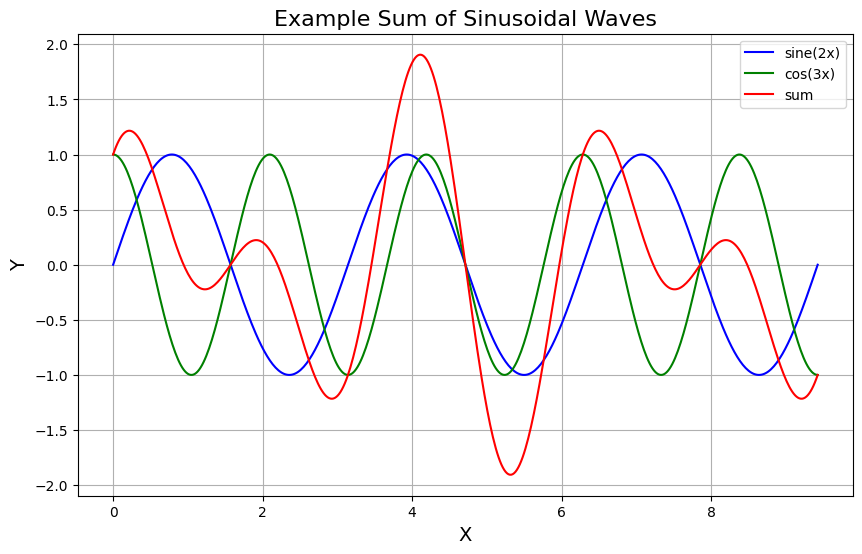

In [4]:
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 3 * np.pi, 500)

y1 = np.sin(2 * x)
y2 = np.cos(3 * x)
y_sum = y1 + y2

# plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sine(2x)', color='blue')
plt.plot(x, y2, label='cos(3x)', color='green')
plt.plot(x, y_sum, label='sum', color='red')
plt.title('Example Sum of Sinusoidal Waves', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



#trace1 = go.Scatter(x=x, y=y1, mode='lines',name='sine(2x)', line=dict(color='blue'))
#trace2 = go.Scatter(x=x, y=y2, mode='lines', name='cos(3x)', line=dict(color='green'))
#trace3 = go.Scatter(x=x, y=y_sum, mode='lines', name='sum', line=dict(color='red'))
#
#layout = go.Layout(
#    title='Example Sum of Sinusoidal Waves',
#    xaxis=dict(title='X'),
#    yaxis=dict(title='Y')
#)

#data = [trace1, trace2, trace3]
#
#fig = go.Figure(data=data, layout=layout)
#
#fig.show()


Notice that the functions of sin(2x) and cos(3x) are very uniform and simple functions yet their summation (red line) leads to a more complex pattern. This is the main idea behind the Fourier series.

We can even use the Fourier series to construct a square wave by summing sine waves (harmonics) of different odd number frequencies and amplitudes:

$$
y(x) = \sum_{n=1,3,5,\dots}^{\infty} \frac{1}{n} \sin(nx)
$$

In [5]:
import plotly.graph_objs as go
import numpy as np

x = np.linspace(0, 3 * np.pi, 1000)
y = np.array([np.sin((2*k + 1) * x) / (2*k + 1) for k in range(100)]).sum(axis=0) * (4 / np.pi)

trace = go.Scatter(x=x, y=y, mode='lines', name='Square Wave', line=dict(color='blue'))

layout = go.Layout(
    title='Square Wave',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y', range=[-1.5, 1.5])
)

data = [trace]

fig = go.Figure(data=data, layout=layout)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

What’s staggering about this result is that we have generated a sharp and straight line plot from smooth sine functions. This shows the true power of the Fourier series to construct any periodic function.

### Theory

As we said above, the Fourier series states that any periodic function can be broken down into a sum of sine and cosine waves. Mathematically, this is written as:

$$
f(x) = A_0 + \sum_{n=1}^{\infty} \left( A_n \cos\left(\frac{2 \pi n x}{P}\right) + B_n \sin\left(\frac{2 \pi n x}{P}\right) \right)
$$

Where:
- A_0: average value of the given periodic function
- A_n: coefficients of the cosine components
- B_n: coefficients of the sine components
- n: the order which is the frequency of the sine or cosine wave, this is referred to as the ‘harmonics’
- P: period of the function

The period, P, and order, n, are known ahead of time. However, the coefficients (A_0, A_n, B_n) need to be calculated to determine which sine and cosine components combined produce the given periodic function. Luckily most Python data science packages do this process for us!

### Link to Forecasting


Are you wondering how does the Fourier series fit into time series forecasting? Well, remember that Fourier series deal with periodic functions and we often find that time series contain some periodic structure (typically seasonality). Therefore, we can use the Fourier series to model any complex seasonal pattern in our time series data!

Pros of using the Fourier series to model seasonality are:
- Any season length
- Model multiple seasonal patterns
- The sensitivity of the Fourier seasonality can be tuned through the order and amplitudes of the sine and cosine components
- Computationally efficient when seasonal periods are greater than ~200

Many of these advantges cannot be achieved with the SARIMA model as it only accepts integer seasonality, a single season, and often runs out of memory when the seasonal period is more than ~200.

Cons of using the Fourier series to model seasonality are:
- Assumes seasonal patterns and cycles remain fixed


## ARIMAX & Exogenous Features


### Intuition

For ARIMA models we can add extra external features to aid in the forecasting. These features are called exogenous features and make the ARIMA model become an ARIMAX model. For example, we may use the current interest rates as an exogenous feature when forecasting the value of a house.

You can think of the ARIMAX model as just like regular linear regression with the addition of autoregressors and moving-average components (endogenous variables). The trick here is to allow the Fourier series to be one of these exogenous features or an explanatory variable as is often described in linear regression.

As we are dealing with time series, the exogenous features need to be time indexed just like the autoregressors and moving-averages. They also need to be known at the point of the forecast. For example, if we want to forecast the value of a house in May, we need to know what the interest rates are in May if we want them as an exogenous feature.

### Theory

Mathematically, the exogenous features are added to the classic ARIMA model in the following way:

$$
y_t = \beta x_t + \phi_1 y_{t-1} + \cdots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \cdots + \theta_p \epsilon_{t-p} + \epsilon_t
$$

- y: time-series/lags at different time steps
- x: exogenous feature
- β: coefficient for exogenous feature
- ϕ: coefficients of the autoregressive components (lags)
- p: number of autoregressive components
- ε: forecast error terms, the moving-average components
- θ: coefficients of the lagged forecast errors
- q: number of lagged error components

### Fourier Series Features


To add the Fourier series as exogenous to an ARIMA model is relatively simple as the coefficients/amplitudes, β, are deduced for us and all we need to provide are the corresponding sine and cosine terms. In pseudo-code, this is equivalent to:

In [ ]:
sin(2*pi*frequency*time_index/period)

cos(2*pi*frequency*time_index/period)

NameError: name 'sin' is not defined

As an example, let’s say we have monthly data with a yearly seasonality and we want the Fourier components for May. This, in pseudo-code, would be:

In [ ]:
sin(2*pi*frequency*5/12)

cos(2*pi*frequency*5/12)

However, we still have the frequency (the order) value to deduce. This is typically found by passing numerous sine and cosine component orders and letting the model find the most useful ones.

### Python Walkthrough



In [ ]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pmdarima as pm
import numpy as np

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data['month_num'] = data['Month'].dt.month

# Stabilise the variance
data['Passengers_Boxcox'], lam = boxcox(data['#Passengers'])
data.dropna(inplace=True)

# Get fourier features
for order in range(1, 10):
    data[f'fourier_sin_order_{order}'] = np.sin(2 * np.pi * order * data['month_num'] / 12)
    data[f'fourier_cos_order_{order}'] = np.cos(2 * np.pi * order * data['month_num'] / 12)

# name of fourier features
fourier_features = [i for i in list(data) if i.startswith('fourier')]

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build auto-ARIMA model with fourier features
model = pm.auto_arima(train['Passengers_Boxcox'],
                      X=train[fourier_features],
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      max_order=None,
                      information_criterion='aicc',
                      error_action="ignore")

# Get the forecasts and apply inverse box-cox transform
boxcox_forecasts = model.predict(n_periods=len(test), X=test[fourier_features])
forecasts = inv_boxcox(boxcox_forecasts, lam)


def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'Harmonic Regression')


# Summary

When the seasonality of your time series is a non-integer, has numerous patterns, or is very long (>50 points) then it is preferable to use the Fourier series to model this seasonality component. This can be achieved by adding the Fourier series as an exogenous feature to a regular ARIMA model to make it an ARIMAX. These exogenous features are external covariates that aid in the forecasting of the time series.